# Linear - Cubic Comparison
In this notebook, I have moved some of the earlier code which deals with comparing calculations using the linear scaling and cubic scaling versions of the code.

First we create the objects that are responsible for running a calculation.

In [1]:
from BigDFT import Calculators as C

In [2]:
code = C.SystemCalculator()

Initialize a Calculator with OMP_NUM_THREADS=2 and command mpirun -machinefile /var/lib/oar/1883596 /home/wdawson/share/binaries/python3/install/bin/bigdft


## System for Comparison
We will compare two water molecules in a vacuum.

In [3]:
positions ="""
- O: [-0.931477999671, 0.004547999723, -0.117331000086]
- H: [-1.355753693973, -0.032108553467, 0.725181911626]
- H: [-0.003078395366, 0.011003111969, 0.053703839371]
- O: [1.500000000000, -0.003706000000, 0.113495000000]
- H: [1.796831000000, 0.762122000000, -0.351887000000]
- H: [1.773536000000, -0.747744000000, -0.399151000000]
"""

In [4]:
from futile import YamlIO as Y
posinp = {"positions": Y.load(stream=positions, doc_lists=False),
          "units":"angstroem"}

## Calculation Conditions
With the positions defined, we now move towards defining the different calculation parameters. First, the linear scaling calculation.

In [5]:
from BigDFT import Inputfiles as I

In [6]:
inp = I.Inputfile()
inp.set_xc("PBE")
inp.set_hgrid(0.4)
inp.write_orbitals_on_disk()
inp.calculate_dipole()
inp["import"] = "linear"

Now the cubic scaling input file.

In [8]:
from BigDFT import InputActions as A
from copy import deepcopy
inp_cubic = deepcopy(inp)
inp_cubic.pop("import")
inp_cubic.remove(A.write_orbitals_on_disk)
inp_cubic.read_orbitals_from_disk()

## Actual Runs

In [9]:
full_qm = code.run(name="linear", input=inp, posinp=posinp, skip=False)
full_qm_cubic = code.run(name="cubic", input=inp_cubic, posinp=posinp, skip=False)

Creating the yaml input file "./linear.yaml"
Executing command:  mpirun -machinefile /var/lib/oar/1883596 /home/wdawson/share/binaries/python3/install/bin/bigdft -n linear
Creating the yaml input file "./cubic.yaml"
Executing command:  mpirun -machinefile /var/lib/oar/1883596 /home/wdawson/share/binaries/python3/install/bin/bigdft -n cubic


## Comparison

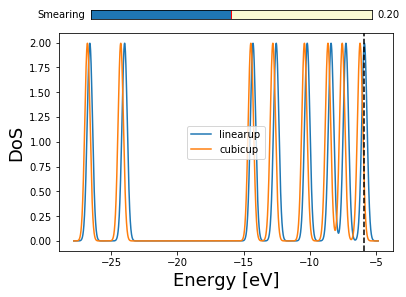

In [11]:
linear_dos = full_qm.get_dos(label="linear")
linear_dos.append_from_bandarray(full_qm_cubic.evals, label="cubic")
linear_dos.plot()

In [12]:
print(full_qm.dipole)
print(full_qm_cubic.dipole)

[1.098699, -0.01258121, 0.006153344]
[1.080574, -0.006348463, 0.008058685]
